# 05 - Spatial Features

This notebook implements spatial feature engineering for Airbnb price prediction.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

# Add src to path
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), "..")))

# Import spatial features
from src.features.spatial import create_spatial_features

# Set up plotting
%matplotlib inline
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

## Load Data

In [2]:
# Load the encoded data
base_path = os.path.abspath(os.path.join(os.getcwd(), ".."))
data_path = os.path.join(base_path, "data", "processed", "features", "listings_encoded_clean.csv")

df = pd.read_csv(data_path)
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (7096, 132)


,id,scrape_id,host_id,host_since,host_location,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,...,amenity_coffee_maker,amenity_refrigerator,amenities_count,last_scraped_2025-03-19,last_scraped_2025-03-20,source_city scrape,source_previous scrape,has_availability_t,calendar_last_scraped_2025-03-19,calendar_last_scraped_2025-03-20
0,97945,0.0,517685,18,184,1.0,0.00,0,2,4,...,1,1,38,True,False,True,False,True,True,False
1,114695,0.0,581737,20,184,1.0,0.95,1,3,3,...,1,1,31,True,False,True,False,True,True,False
2,127383,0.0,630556,22,184,0.8,0.88,0,2,2,...,1,1,34,False,True,False,True,True,False,True
3,159634,0.0,765694,24,184,1.0,1.00,0,1,1,...,1,1,56,False,True,False,True,True,False,True
4,170154,0.0,108297,5,184,1.0,1.00,1,1,1,...,1,1,42,False,True,True,False,True,False,True


## Check Spatial Data

In [3]:
# Check if we have latitude and longitude
print("Spatial columns:")
spatial_cols = ['latitude', 'longitude']
for col in spatial_cols:
    if col in df.columns:
        print(f"  {col}: {df[col].dtype}, missing: {df[col].isnull().sum()}")
    else:
        print(f"  {col}: NOT FOUND")

# Display spatial data summary
if 'latitude' in df.columns and 'longitude' in df.columns:
    print(f"\nSpatial data summary:")
    print(f"  Latitude range: {df['latitude'].min():.4f} to {df['latitude'].max():.4f}")
    print(f"  Longitude range: {df['longitude'].min():.4f} to {df['longitude'].max():.4f}")
    print(f"  Total listings: {len(df)}")

Spatial columns:
  latitude: float64, missing: 0
  longitude: float64, missing: 0

Spatial data summary:
  Latitude range: -2.6416 to 3.4260
  Longitude range: -3.4644 to 2.9665
  Total listings: 7096


## Visualize Spatial Distribution

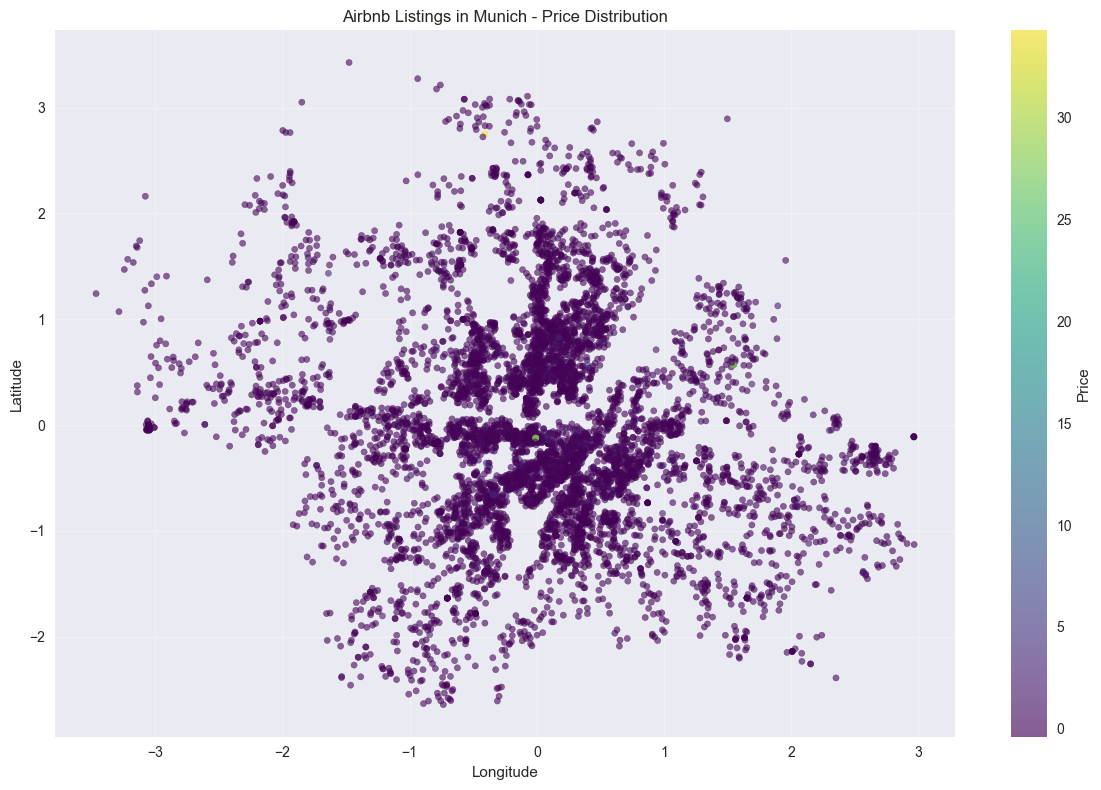

In [4]:
# Plot spatial distribution
plt.figure(figsize=(12, 8))
plt.scatter(df['longitude'], df['latitude'], c=df['price'], 
           cmap='viridis', alpha=0.6, s=20)
plt.colorbar(label='Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Airbnb Listings in Munich - Price Distribution')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Create Spatial Features

In [5]:
# Create spatial features
df_spatial = create_spatial_features(df)

print(f"\nSpatial features created!")
print(f"Original shape: {df.shape}")
print(f"New shape: {df_spatial.shape}")
print(f"New spatial features: {df_spatial.shape[1] - df.shape[1]}")

🚀 Creating spatial features...
1. Calculating distance to city center...
2. Creating spatial clusters...
3. Calculating distances to points of interest...
4. Creating density features...
5. Creating additional spatial features...
✅ Spatial features created successfully!
   Original shape: (7096, 132)
   New shape: (7096, 151)
   New spatial features: 19

Spatial features created!
Original shape: (7096, 132)
New shape: (7096, 151)
New spatial features: 19


## Analyze New Spatial Features

In [6]:
# Get new spatial features
original_cols = set(df.columns)
new_cols = set(df_spatial.columns) - original_cols
spatial_features = list(new_cols)

print(f"New spatial features ({len(spatial_features)}):")
for feature in sorted(spatial_features):
    print(f"  {feature}")

# Show correlation with price
spatial_corr = df_spatial[spatial_features + ['price']].corr()['price'].sort_values(ascending=False)
print(f"\nTop 10 spatial features correlated with price:")
print(spatial_corr.head(11))  # Include price itself

New spatial features (19):
  avg_price_1.0km
  avg_price_2.0km
  cluster_center_lat
  cluster_center_lon
  distance_to_airport
  distance_to_bmw_welt
  distance_to_center
  distance_to_central_station
  distance_to_english_garden
  distance_to_marienplatz
  distance_to_nearest_listing
  distance_to_oktoberfest
  distance_to_olympic_park
  distance_to_university
  latitude_scaled
  listings_density_1.0km
  listings_density_2.0km
  longitude_scaled
  spatial_cluster

Top 10 spatial features correlated with price:
price                       1.000000
avg_price_1.0km             0.631499
avg_price_2.0km             0.503769
longitude_scaled            0.023640
cluster_center_lon          0.018047
latitude_scaled             0.013407
listings_density_2.0km      0.009372
listings_density_1.0km      0.007834
cluster_center_lat         -0.000929
distance_to_olympic_park   -0.019810
distance_to_bmw_welt       -0.019815
Name: price, dtype: float64


## Save Spatial Features

In [7]:
# Save the data with spatial features
output_path = os.path.join(base_path, "data", "processed", "features", "listings_spatial_features.csv")
df_spatial.to_csv(output_path, index=False)
print(f"✅ Spatial features saved to: {output_path}")

✅ Spatial features saved to: /Users/claudiupanainte/Desktop/Airbnb-price-prediction_02/data/processed/features/listings_spatial_features.csv
